# **Import librairies**

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# **Import the data**

In [5]:
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

# **Exploring the data**

In [7]:
# Gain some basic informations about the data
print("Dataset columns: ", train.columns)
print(train.info())

Dataset columns:  Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [8]:
# Separate features from the target ("label" column here)
X = train.drop('label', axis = 1)
y = train.label                   #target attribute

# **Normalize & split the data**

In [10]:
#features values must range from 0 to 1
X = X / 255.0    
X_test = X_test/255.0

In [11]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test_final, y_val, y_test_final = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (4200, 784)
y_val shape: (4200,)


# **Visualize some training examples**

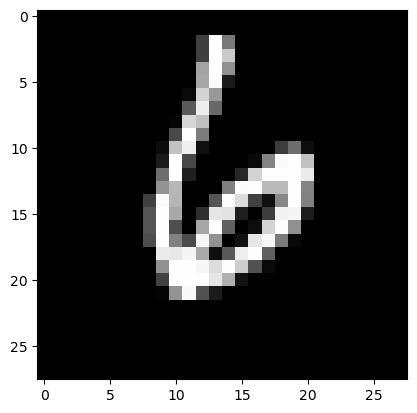

In [14]:
# resize the data to it's original form to visualize
X_train_reshaped = X_train.to_numpy().reshape(-1, 28, 28)

plt.imshow(X_train_reshaped[0], cmap='gray')

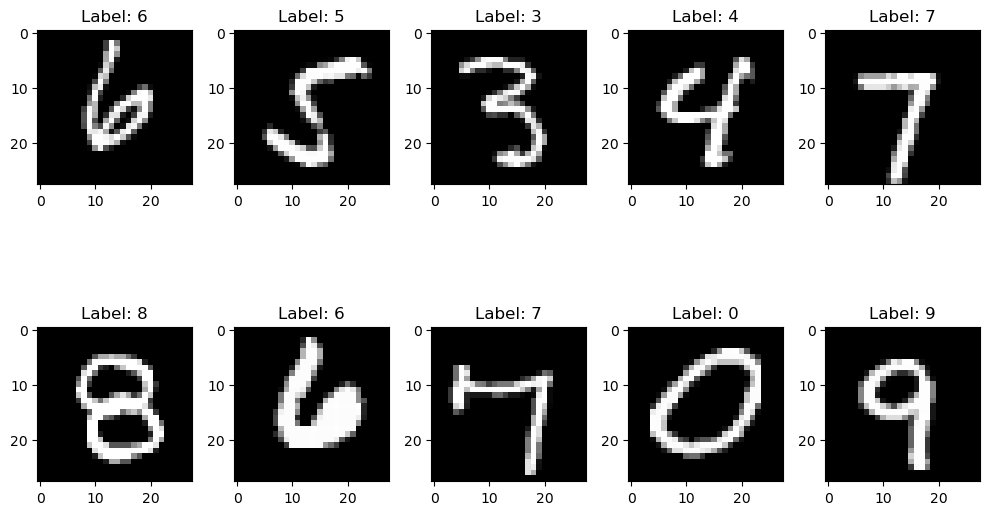

In [15]:
#visualize the first 10 images and their label

plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i], cmap='gray')
    plt.title(f"Label: {y_train.iloc[i]}")
plt.tight_layout()


# **Building models**

In [17]:
# try three models with different architecture of layers
input_shape = [X_train.shape[1]]

# Model_1: Balanced architecture with moderate complexity
# This model has a few hidden layers with moderate units.

model_1 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 350, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 165, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'softmax')
])

# Model_2: Simpler architecture with fewer parameters
# Suitable for faster training with lower capacity to learn complex patterns.
model_2 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 80, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    Dense(units = 10, activation = 'softmax')
])

# Model_3: Deeper architecture with many more units and layers
# Designed to handle more complex datasets; may require more computation time.
model_3 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 560, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 700, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 430, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 120, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'softmax')
])

C:\Users\Vivek.Nakka\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Decreasing learning rate by 5% every epoch to improve convergence and prevent overshooting the minimum
lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 0.95**epoch)

Training model_1...
Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7459 - loss: 0.8426 - val_accuracy: 0.9460 - val_loss: 0.1643 - learning_rate: 0.0010
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9260 - loss: 0.2439 - val_accuracy: 0.9567 - val_loss: 0.1421 - learning_rate: 9.5000e-04
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9484 - loss: 0.1705 - val_accuracy: 0.9624 - val_loss: 0.1206 - learning_rate: 9.0250e-04
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9602 - loss: 0.1328 - val_accuracy: 0.9671 - val_loss: 0.1153 - learning_rate: 8.5737e-04
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9667 - loss: 0.1042 - val_accuracy: 0.9671 - val_loss: 0.1136 - learning_rate: 8.1451e-04
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9722 - loss: 0.0879 - val_accuracy: 0.9690 - val_loss: 0.1109 - learning_rate: 7.7378e-04
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/

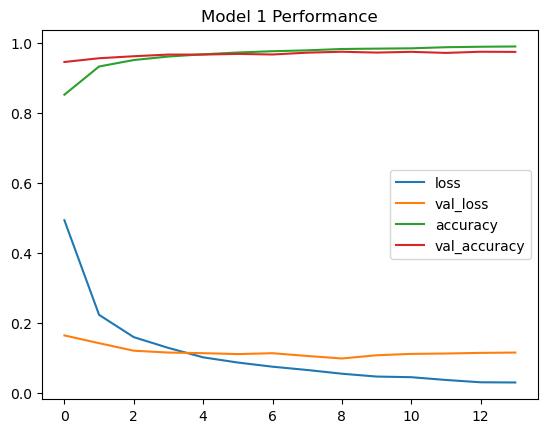

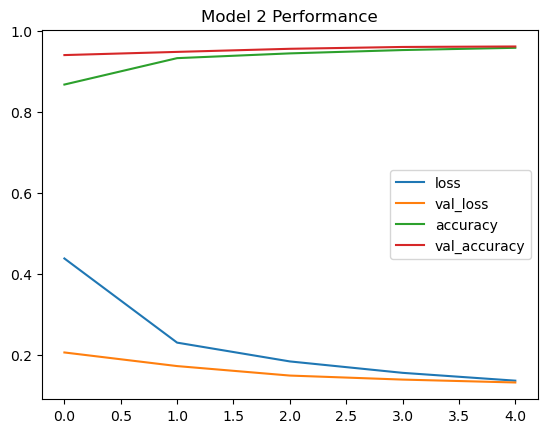

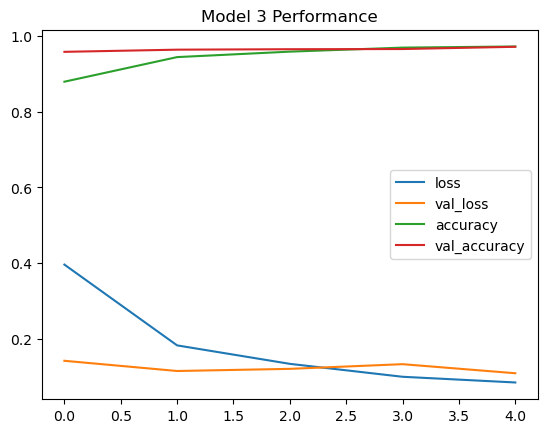

In [19]:
# evaluate each model 

models = [model_1, model_2, model_3]

# Early stopping to prevent overfitting by monitoring validation accuracy
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy for better stopping   
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)


for model in models:
    # This loss function is suitable for multiclass classification problems with integer-encoded target labels.
    # Adam is an advanced optimizer combining momentum and adaptive learning rate, ensuring faster and more stable convergence.
    model.compile(loss = SparseCategoricalCrossentropy(from_logits= False),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
               metrics = ['accuracy'])
    
    print(f"Training model_{models.index(model) + 1}...")
    history = model.fit(X_train, y_train, epochs = 50,
           validation_data = (X_val, y_val),
           batch_size = 64,
           callbacks=[early_stopping, lr_schedule],
           shuffle=True,
           verbose = 1
           )
    
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss', 'accuracy', 'val_accuracy']].plot(title=f"Model {models.index(model) + 1} Performance")

    #history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
    
    print("Done!\n")

In [20]:
# Evaluate each model's performance on validation data
for idx, model in enumerate(models):
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Model_{idx + 1} - Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

Model_1 - Validation Loss: 0.0984, Validation Accuracy: 0.9752
Model_2 - Validation Loss: 0.2070, Validation Accuracy: 0.9398
Model_3 - Validation Loss: 0.1427, Validation Accuracy: 0.9579


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[404   0   1   0   1   1   2   1   0   1]
 [  0 450   2   0   1   0   1   0   0   0]
 [  1   2 410   4   1   1   1   0   2   0]
 [  3   1   1 468   0   6   0   3   6   1]
 [  1   0   0   0 441   1   3   0   0   5]
 [  0   0   0   2   1 333   0   0   1   1]
 [  0   0   1   0   0   4 391   0   0   0]
 [  0   1   0   0   2   0   0 431   1   1]
 [  0   3   4   1   3   6   0   2 374   0]
 [  0   0   1   5   6   0   0   3   1 394]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       411
           1       0.98      0.99      0.99       454
           2       0.98      0.97      0.97       422
           3       0.97      0.96      0.97       489
           4       0.97      0.98      0.97       451
           5       0.95      0.99      0.97       338
           6       0.98      0.99      0.98       396
           7       0.98      0.99      0.98       436
           8       0.97      0.95      0.

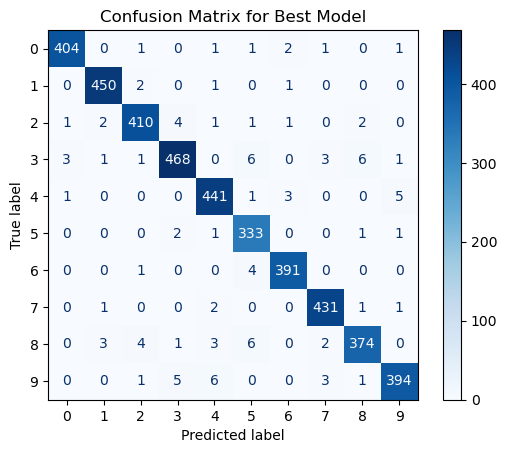

In [21]:
# It's seems like model_1 performs better
best_model = model_1

# Evaluate model on validation data and generate predictions
y_pred = best_model.predict(X_val).argmax(axis=1)

# Add Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.title("Confusion Matrix for Best Model")
plt.show()

In [22]:
# Train on training set using explicit validation data
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_schedule], batch_size=64, epochs=50)

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9773 - loss: 0.0687 - val_accuracy: 0.9693 - val_loss: 0.1123 - learning_rate: 0.0010
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9754 - loss: 0.0739 - val_accuracy: 0.9698 - val_loss: 0.1196 - learning_rate: 9.5000e-04
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9822 - loss: 0.0537 - val_accuracy: 0.9726 - val_loss: 0.1061 - learning_rate: 9.0250e-04
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9856 - loss: 0.0451 - val_accuracy: 0.9717 - val_loss: 0.1234 - learning_rate: 8.5737e-04
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9859 - loss: 0.0418 - val_accuracy: 0.9752 - val_loss: 0.1110 - learning_rate: 8.1451e-04


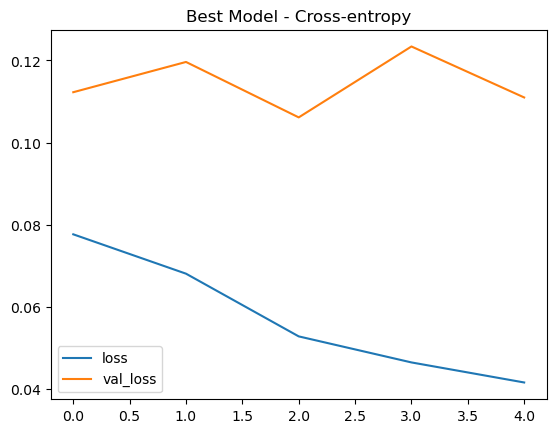

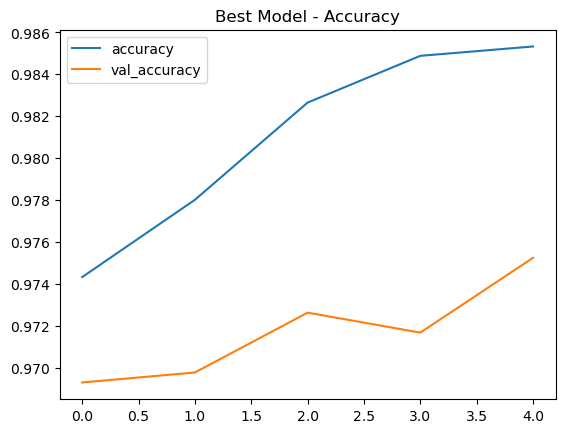

In [23]:
history_df = pd.DataFrame(history.history)

# Plot only if the key exists in the DataFrame to avoid KeyError
if 'val_loss' in history_df.columns:
    history_df.loc[:, ['loss', 'val_loss']].plot(title="Best Model - Cross-entropy")
else:
    history_df.loc[:, ['loss']].plot(title="Best Model - Cross-entropy")

if 'val_accuracy' in history_df.columns:
    history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Best Model - Accuracy")
else:
    history_df.loc[:, ['accuracy']].plot(title="Best Model - Accuracy")

In [24]:
# Evaluate best model on the final test set
final_eval_loss, final_eval_accuracy = best_model.evaluate(X_test_final, y_test_final)
print(f"Final Test Set Loss: {final_eval_loss}")
print(f"Final Test Set Accuracy: {final_eval_accuracy}")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.0957
Final Test Set Loss: 0.1012176051735878
Final Test Set Accuracy: 0.9726190567016602


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


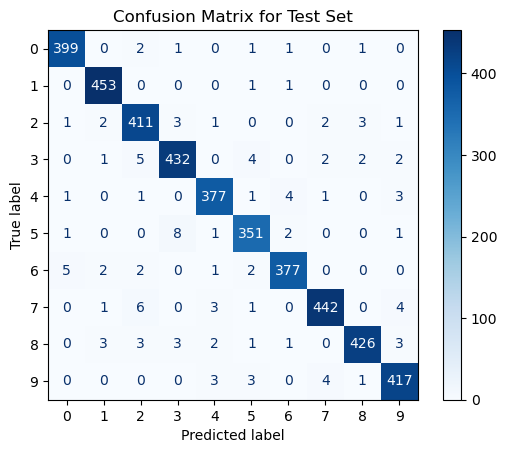

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       405
           1       0.98      1.00      0.99       455
           2       0.96      0.97      0.96       424
           3       0.97      0.96      0.97       448
           4       0.97      0.97      0.97       388
           5       0.96      0.96      0.96       364
           6       0.98      0.97      0.97       389
           7       0.98      0.97      0.97       457
           8       0.98      0.96      0.97       442
           9       0.97      0.97      0.97       428

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



In [25]:
# Generate predictions on the test set
y_test_pred = best_model.predict(X_test_final).argmax(axis=1)

# Add Confusion Matrix and Classification Report for the test set
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_final, y_test_pred, cmap='Blues')
plt.title("Confusion Matrix for Test Set")
plt.show()

print(classification_report(y_test_final, y_test_pred))

In [26]:
test_predictions = best_model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [27]:
ImageId = []
Label = []
for i in range(len(test_predictions)):
    ImageId.append(i+1)
    Label.append(test_predictions[i].argmax())
    
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("submission.csv", index=False, header=True)